# Precipitation at International Falls 1970-2010

* <a href=#section01>Load Precipitation Data for International Falls</a>
* <a href=#section02>Comparison of 1970-1999 to 2000-2010</a>
* <a href=#section03>Correlation of Precipitation and Rainy River Flow</a>

### Initialize Notebook

In [1]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# use seaborn for statistical plotting
import seaborn

# Data directory
dir = '../data/'
img = '../images'

/Users/jeff/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## <a name=section01></a>Load Precipitation Data for International Falls

Precipitation data for International Falls was obtained from the Global Historical Climatology network and stored as a Pandas data series in `./data/KINL.pkl` in the standard metrics units of mm. In the following cell we read the data seri

In [2]:
KINL = pd.read_pickle(dir+'KINL.pkl')
KINL = KINL['1970':'2010']

### Annual Precipitation

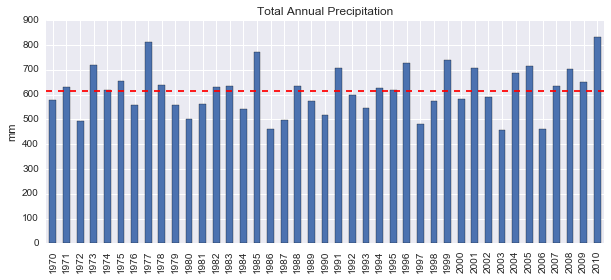

In [3]:
plt.figure(figsize=(10,4))
KINL.groupby(KINL.index.year).sum().plot(kind='bar')
plt.title('Total Annual Precipitation')
plt.ylabel('mm')

meanPrcp = KINL.groupby(KINL.index.year).sum().mean()
plt.hold(True)
plt.plot(plt.xlim(),(meanPrcp,meanPrcp),'r--');
plt.hold(False)

### Distribution of Annual Precipitation

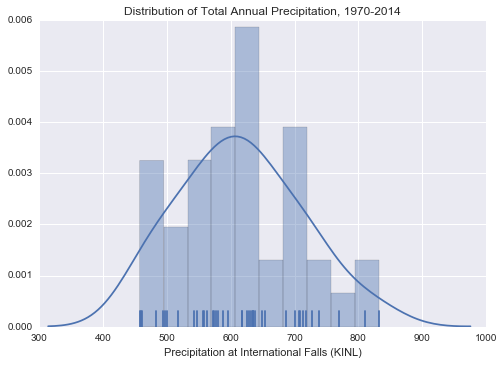

In [4]:

plt.hold(True)
seaborn.distplot(KINL.groupby(KINL.index.year).sum(),bins=10,rug=True)
plt.title('Distribution of Total Annual Precipitation, 1970-2014')
plt.hold(False)

### Monthly Precipitation

(0, 110)

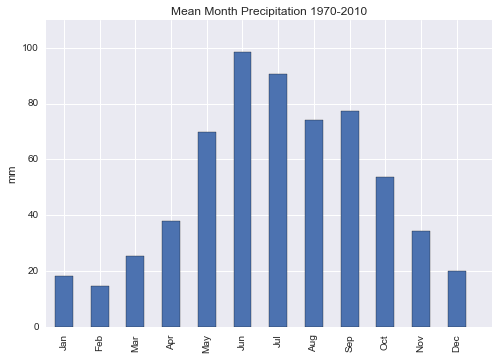

In [5]:
(KINL.groupby(KINL.index.month).sum()/41).plot(kind='bar')

plt.gca().set_xticks(range(0,13))
plt.gca().set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));
plt.title('Mean Month Precipitation 1970-2010')
plt.ylabel('mm')
plt.ylim(0,110)

### Distribution of Monthy Precipitation

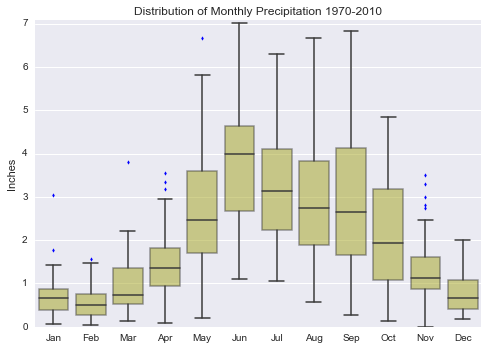

In [13]:
a = []
for mo,p in KINL.groupby(KINL.index.month):
        a.append([q.sum() for yr,q in p.groupby(p.index.year)])

plt.hold(True)
seaborn.boxplot(a,color='y',alpha=0.5)
plt.gca().set_xticks(np.arange(1.0,13.0,1.0))
plt.gca().set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));
plt.ylim(0,180)
plt.title('Distribution of Monthly Precipitation 1970-2010')
plt.ylabel('mm')
plt.gca().set_yticks(np.arange(0,190,25.4))
plt.gca().set_yticklabels(np.arange(0,8,1))
plt.ylabel('Inches')
plt.hold(False)

## <a name=section02></a>Comparison of 1970-1999 to 2000-2010

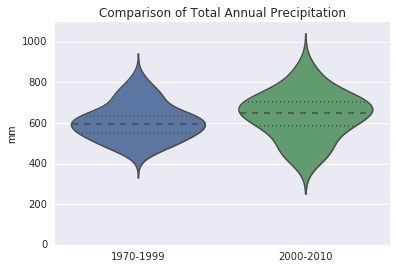

In [17]:
p = KINL.groupby(KINL.index.year).sum()

plt.hold(True)
seaborn.violinplot([p.ix[1970:2000],p.ix[2000:2010]],names=['1970-1999','2000-2010'])
plt.ylim([0,1100.0])
plt.title('Comparison of Total Annual Precipitation')
plt.ylabel('mm')
plt.hold(False)

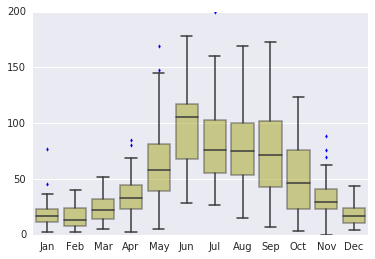

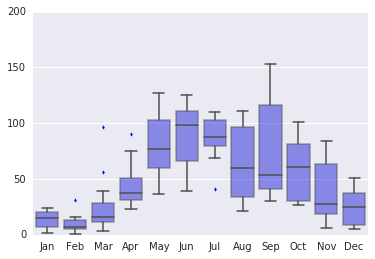

In [18]:
a = []
b = []

for mo,p in KINL.groupby(KINL.index.month):
        a.append([q.sum() for yr,q in p['1970':'2000'].groupby(p['1970':'2000'].index.year)])
        b.append([q.sum() for yr,q in p['2000':'2010'].groupby(p['2000':'2010'].index.year)])
        
plt.hold(True)
seaborn.boxplot(a,color='y',alpha=0.5)
plt.ylim(0,200)

ax = plt.gca()
ax.set_xticks(np.arange(1.0,13.0,1.0))
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));

plt.figure()
seaborn.boxplot(b,color='b',alpha=0.5)
plt.ylim(0,200)
plt.hold(False)

ax = plt.gca()
ax.set_xticks(np.arange(1.0,13.0,1.0))
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));

The average total annual precipitation appeared to increase from 2000-2010 compared to 1970-1999, but there is not enough data to establish statistical significance.

## <a name=section03></a>Correlation of Precipitation and Rainy River Flow

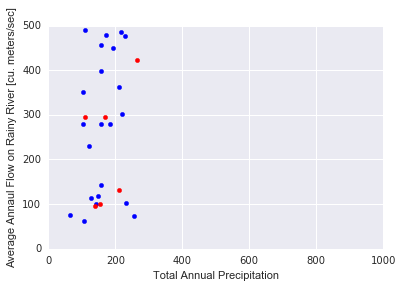

In [19]:
RR = pd.read_pickle(dir+'RR.pkl')
KINL = pd.read_pickle(dir+'KINL.pkl')

RR = RR[RR.index.month >= 5]
RR = RR[RR.index.month <= 6]

KINL = KINL[KINL.index.month >= 5]
KINL = KINL[KINL.index.month <= 6]

plt.hold(True)
v  = [[RR[RR.index.year==yr].mean(),KINL[KINL.index.year==yr].sum()] 
 for yr in range(1970,2000)]
v = np.transpose(v)
plt.scatter(v[1],v[0],color='b')

v  = [[RR[RR.index.year==yr].mean(),KINL[KINL.index.year==yr].sum()] 
 for yr in range(2000,2011)]
v = np.transpose(v)
plt.scatter(v[1],v[0],color='r')

plt.xlim(0,1000)
plt.ylim(0,500)
plt.ylabel('Average Annaul Flow on Rainy River [cu. meters/sec]')
plt.xlabel('Total Annual Precipitation')
plt.hold(False)